# Proyek Analisis Data: Bike Sharing

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim terhadap preferensi pengguna terdaftar atau pengguna biasa dalam memilih untuk menyewa sepeda?
- Apakah terdapat tren pertumbuhan atau penurunan dalam jumlah total sepeda yang disewakan dari tahun 2011 ke tahun 2012?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

Pada cell ini, saya mengimpor library numpy, pandas, matplotlib, seaborn dan streamlit yang akan saya gunakan untuk menganalisis, dan memvisualisasikan data dari dataset Bike Sharing 

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv(r'C:\Users\ACER\proyek_analisis_data\submission\data\day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Pada cell ini, saya menggunakan fungsi pd.read_csv() untuk membaca file CSV dari path day dan memuat datanya ke dalam DataFrame pandas. Saya menggunakan string raw untuk memberitahu python untuk mengabaikan escape sequences dan menganggap backslash sebagai karakter biasa. Saya juga menggunakan fungsi head() untuk menampilkan lima baris pertama dari DataFrame.

### Assessing Data

In [3]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Pada cell ini, saya menggunakan metode info() pada DataFrame day_df. Untuk memeriksa tipe data dari setiap kolom. Dan disini saya menemukan kesalahan yaitu pada kolom dteday yang seharusnya bertipe data datetime bukan object.

In [4]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Pada cell ini, saya menggunakan metode duplicated() pada DataFrame day_df untuk mencari baris yang duplikat. Dan menggunakan metode describe() untuk menampilkan ringkasan parameter statistik dari DataFrame day_df.

### Cleaning Data

In [5]:
datetime_columns = ['dteday']
for column in datetime_columns:
    day_df[column]= pd.to_datetime(day_df[column])

Kode di atas akan mengubah tipe data pada kolom dteday menjadi datetime. Untuk memastikan hal ini berjalan sesuai harapan, periksa kembali tipe data tersebut menggunakan method info()

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

In [7]:
day_df.describe(include ='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


kode di atas akan menampilkan rangkuman parameter statistik dari data day_df

### Explore Pertanyaan 1

In [8]:
rata_rata_peminjaman = day_df.groupby('season')[['casual', 'registered']].mean()
rata_rata_peminjaman.describe()

,casual,registered
count,4.000000,4.000000
mean,843.187516,3649.045042
std,395.663272,950.615740
min,334.928177,2269.204420
25%,630.566314,3481.976377
50%,917.605093,3942.642129
75%,1130.226295,4109.710794
max,1202.611702,4441.691489


kode diatas akan mengelompokan data day_df berdasarkan kolom season. ia menghitung rata-rata jumlah peminjaman sepeda untuk pengguna casual dan registered.

### Explore Pertanyaan 2

In [9]:
jumlah_peminjaman = day_df.groupby('yr')['cnt'].sum()
jumlah_peminjaman.describe()

count    2.000000e+00
mean     1.646340e+06
std      5.702625e+05
min      1.243103e+06
25%      1.444721e+06
50%      1.646340e+06
75%      1.847958e+06
max      2.049576e+06
Name: cnt, dtype: float64

kode di atas akan mengelompokan data day_df berdasarkan kolom yr. ia menghitung jumlah total peminjaman sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1: 

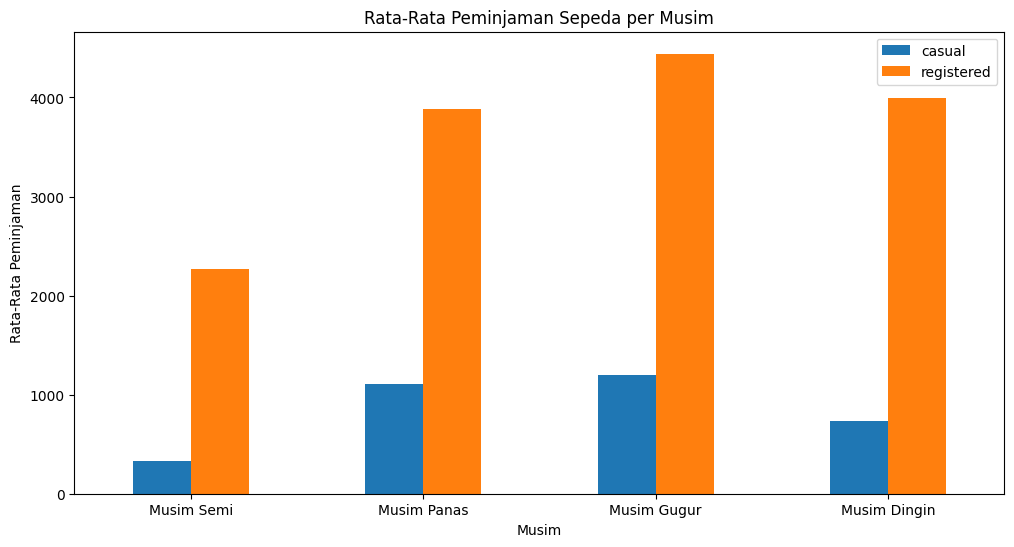

In [10]:
plt.figure(figsize=(12,6))
rata_rata_peminjaman.plot(kind='bar', ax=plt.gca())
plt.title('Rata-Rata Peminjaman Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-Rata Peminjaman')
plt.xticks(np.arange(4), ['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin'], rotation=0)
plt.show()

kode ini membuat plot batang yang menunjukkan rata-rata peminjaman sepeda per musim.

### Pertanyaan 2: 

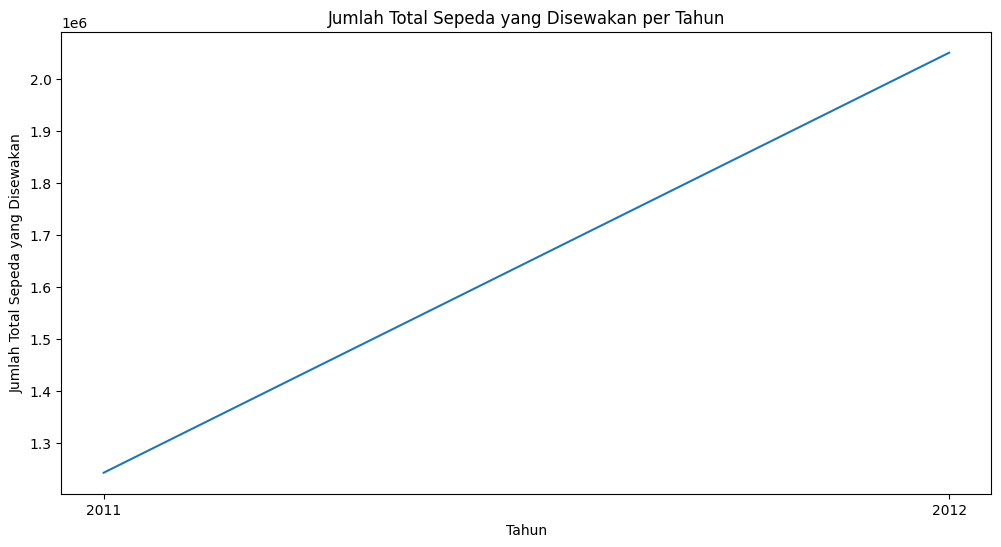

In [11]:
plt.figure(figsize=(12,6))
sns.lineplot(data=jumlah_peminjaman)
plt.title('Jumlah Total Sepeda yang Disewakan per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Total Sepeda yang Disewakan')
plt.xticks(np.arange(2), ['2011', '2012'], rotation=0)
plt.show()

kode ini membuat plot jumlah total sepeda yang disewakan per tahun.

## Conclusion

- Conclution pertanyaan 1
  Dari visualisasi di atas kita dapat melihat bahwa musim mempengaruhi penyewaan sepeda untuk pengguna registered maupun casual
- conclution pertanyaan 2
  Dari visualisasi di di atas kita dapat melihat dari tahun 2011 sampai dengan tahun 2012 terjadi tren pertumbuhan jumlah total penyewaan sepeda

In [12]:
day_df.to_csv("main_data.csv", index=False)